# Тестирование Метода главных компанент и автоэнкодеров для снижения векторного пространства

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, LSTM
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.models import Sequential

In [114]:
x_train = np.random.uniform(low=-10, high=10, size=10000)
y_train = np.random.uniform(low=-100, high=100, size=10000)
noise = np.random.normal(loc=0, scale=0.1, size=10000)  # Создаем нормально распределенный шум

z_train = x_train**3 + y_train + noise

train_array = np.vstack((x_train, y_train, z_train)).T

train_array

array([[ 8.65524813e+00,  9.86308887e+01,  7.47028168e+02],
       [-5.57465427e+00,  7.00434133e+01, -1.03079789e+02],
       [-1.26627287e-01,  1.12054000e+01,  1.12468282e+01],
       ...,
       [ 9.05312412e+00,  9.68205399e+01,  8.38661513e+02],
       [ 8.53019343e-01,  1.35373187e+01,  1.41589734e+01],
       [ 4.11765191e+00, -8.48898603e+01, -1.49108164e+01]])

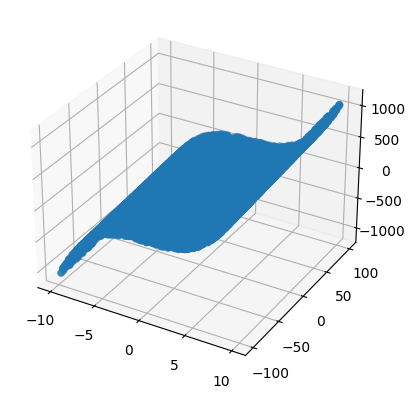

In [115]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
a= ax.scatter(train_array[:, 0], train_array[:, 1], train_array[:, 2])

In [157]:
input_img = Input(shape=(3,))
y= Dense(128, activation='relu')(input_img)
encoded = Dense(2, activation='linear')(y)

# Создание модели декодера
input_enc = Input(shape=(2,))
x= Dense(128, activation='relu')(input_enc)
decoded = Dense(3, activation='linear')(x)

# Создание автоэнкодера
encoder = keras.Model(input_img, encoded, name="encoder")
decoder = keras.Model(input_enc, decoded, name="decoder")
autoencoder = keras.Model(input_img, decoder(encoder(input_img)), name="autoencoder")

# Компиляция модели
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [158]:
autoencoder.fit(train_array, train_array, epochs=300, batch_size=32, validation_split=0)

Epoch 1/300
313/313 [==============================] - 1s 1ms/step - loss: 5025.9478
Epoch 2/300
313/313 [==============================] - 0s 1ms/step - loss: 7.9802
Epoch 3/300
313/313 [==============================] - 0s 1ms/step - loss: 2.4321
Epoch 4/300
313/313 [==============================] - 0s 1ms/step - loss: 1.8386
Epoch 5/300
313/313 [==============================] - 0s 1ms/step - loss: 1.5778
Epoch 6/300
313/313 [==============================] - 0s 1ms/step - loss: 1.3586
Epoch 7/300
313/313 [==============================] - 0s 1ms/step - loss: 1.1881
Epoch 8/300
313/313 [==============================] - 0s 1ms/step - loss: 1.2752
Epoch 9/300
313/313 [==============================] - 0s 1ms/step - loss: 0.9729
Epoch 10/300
313/313 [==============================] - 0s 1ms/step - loss: 0.8896
Epoch 11/300
313/313 [==============================] - 0s 1ms/step - loss: 0.9645
Epoch 12/300
313/313 [==============================] - 0s 1ms/step - loss: 0.8447
Epoch 13/3

KeyboardInterrupt: 

In [161]:
h = encoder.predict(train_array)
dec = decoder.predict(h)
train_array, h, dec

313/313 [==============================] - 0s 908us/step


(array([[ 8.65524813e+00,  9.86308887e+01,  7.47028168e+02],
        [-5.57465427e+00,  7.00434133e+01, -1.03079789e+02],
        [-1.26627287e-01,  1.12054000e+01,  1.12468282e+01],
        ...,
        [ 9.05312412e+00,  9.68205399e+01,  8.38661513e+02],
        [ 8.53019343e-01,  1.35373187e+01,  1.41589734e+01],
        [ 4.11765191e+00, -8.48898603e+01, -1.49108164e+01]]),
 array([[ 491.5016  , -587.15295 ],
        [ 130.1427  ,   98.6893  ],
        [  22.493782,   -6.517069],
        ...,
        [ 533.56573 , -662.9005  ],
        [  27.34437 ,   -8.373996],
        [ -71.96685 ,   20.68719 ]], dtype=float32),
 array([[ 1.0623085e+01,  1.0057155e+02,  7.4483588e+02],
        [-5.4004731e+00,  7.0144928e+01, -1.0354175e+02],
        [-8.4416173e-02,  1.1163894e+01,  1.1157166e+01],
        ...,
        [ 1.0346765e+01,  9.8790665e+01,  8.3656622e+02],
        [-1.6136363e-01,  1.3549394e+01,  1.4079348e+01],
        [ 3.3749132e+00, -8.4757492e+01, -1.4431917e+01]], dtype=float

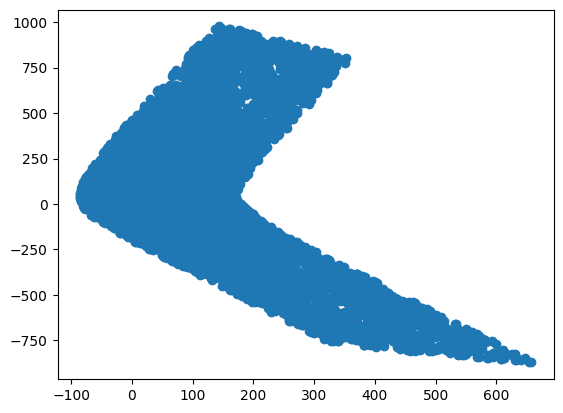

In [162]:
fig = plt.figure()
ax = fig.add_subplot()
a= ax.scatter(h[:, 0], h[:, 1])

In [140]:
# encoder_weights = encoder.get_weights()
# decoder_weights = decoder.get_weights()

# # Вывод весов для каждого слоя
# for i, layer_weights in enumerate(encoder_weights):
#     print(f"Encoder Layer {i+1} weights:")
#     print(layer_weights)

# for i, layer_weights in enumerate(decoder_weights):
#     print(f"Decoder Layer {i+1} weights:")
#     print(layer_weights)

In [153]:
svd = np.linalg.svd(train_array.T)
svd[:2]

(array([[-0.01369574,  0.0141645 , -0.99980588],
        [-0.02047662, -0.99969395, -0.01388241],
        [-0.99969652,  0.02028251,  0.01398159]]),
 array([38162.60525908,  5700.90494356,   231.41741008]))

In [142]:
gv = svd[0].T@train_array.T
gv= gv.T
gv

array([[-7.48939628e+02, -8.33264986e+01,  4.21836422e-01],
       [ 1.01690604e+02, -7.21916554e+01,  3.15998142e+00],
       [-1.14711294e+01, -1.09756502e+01,  1.28293209e-01],
       ...,
       [-8.40513544e+02, -7.96525138e+01,  1.33034926e+00],
       [-1.44435577e+01, -1.32339135e+01, -8.42819500e-01],
       [ 1.65881540e+01,  8.46197751e+01, -3.14685327e+00]])

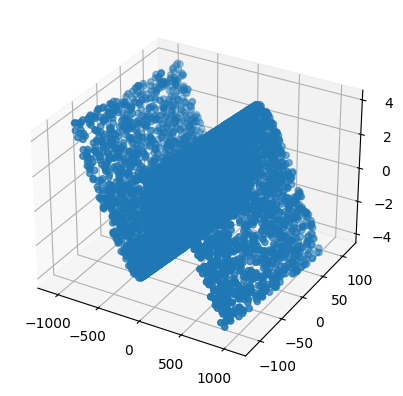

In [143]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
a= ax.scatter(gv[:, 0], gv[:, 1], gv[:, 2])

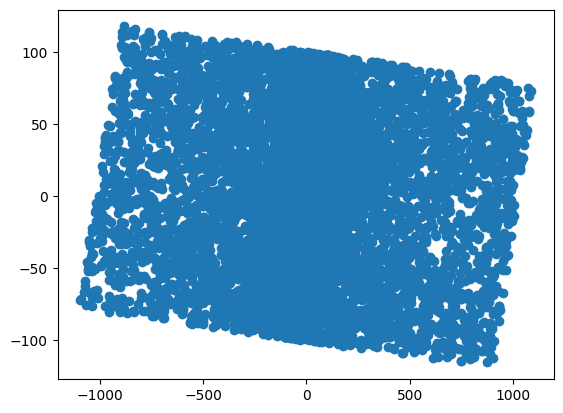

In [144]:
fig = plt.figure()
ax = fig.add_subplot()
a= ax.scatter(gv[:, 0], gv[:, 1])

In [163]:
fake_main_comp = gv
fake_main_comp[: , 2] = 0
main_comp_dec = np.linalg.inv(svd[0].T)@fake_main_comp.T
main_comp_dec = main_comp_dec.T

print("neuron error:",np.sum(mean_squared_error(train_array, dec)))
print("svd error:", np.sum(mean_squared_error(train_array, main_comp_dec)))

neuron error: 5843.624
svd error: 17851.339228901703
